In [1]:
import pandas as pd

In [2]:
players=pd.read_csv("Quotazioni_Fantacalcio.csv")

In [3]:
players["Name"]=players["Name"].str.replace(" ","")
players["Name"]=players["Name"].str.replace("-","")
players["Name"]=players["Name"].str.replace("'","")
print(players.count())
print(players)

Id         570
R          570
Name       570
Squadra    570
Qt. A      570
Qt. I      570
Diff.      570
dtype: int64
       Id  R               Name     Squadra  Qt. A  Qt. I  Diff.
0    2610  A   CRISTIANORONALDO    Juventus     45     46     -1
1    2756  A             PIATEK       Milan     37     38     -1
2     785  A           IMMOBILE       Lazio     36     34      2
3    2531  A            LUKAKUR       Inter     36     35      1
4     608  A            ZAPATAD    Atalanta     35     36     -1
5     568  A       QUAGLIARELLA   Sampdoria     33     34     -1
6     277  A             ICARDI       Inter     31     31      0
7     647  A              DZEKO        Roma     31     30      1
8     441  A            BELOTTI      Torino     31     30      1
9     408  A            HIGUAIN    Juventus     29     29      0
10    409  A            INSIGNE      Napoli     29     27      2
11    410  A            MERTENS      Napoli     29     28      1
12   2012  A              MILIK      

In [4]:
print(players.columns.values)
print(players.dtypes)

['Id' 'R' 'Name' 'Squadra' 'Qt. A' 'Qt. I' 'Diff.']
Id          int64
R          object
Name       object
Squadra    object
Qt. A       int64
Qt. I       int64
Diff.       int64
dtype: object


In [5]:
my_synthesis=pd.read_csv("players_synthesis_by_me.csv")
my_synthesis=my_synthesis.drop_duplicates(subset='Name', keep='first')

my_synthesis["Name"]=my_synthesis["Name"].str.replace(" ","")
my_synthesis["Name"]=my_synthesis["Name"].str.replace("-","")
my_synthesis["Name"]=my_synthesis["Name"].str.replace("'","")

print(my_synthesis.columns.values)
print(my_synthesis.dtypes)
print(my_synthesis.count())

['Unnamed: 0' 'Name' 'VarianceFantasyEvaluation' 'PlayedMatches' 'Team'
 'Role' 'MedianFantasyEvaluation' 'WeightedFantasyEvaluation' 'Qt..A'
 'Qt..I' 'Plays2018_2019' 'Owner' 'Price' 'MantraRole'
 'MeanFantasyEvaluation']
Unnamed: 0                     int64
Name                          object
VarianceFantasyEvaluation    float64
PlayedMatches                  int64
Team                          object
Role                          object
MedianFantasyEvaluation      float64
WeightedFantasyEvaluation    float64
Qt..A                          int64
Qt..I                          int64
Plays2018_2019               float64
Owner                         object
Price                        float64
MantraRole                    object
MeanFantasyEvaluation        float64
dtype: object
Unnamed: 0                   444
Name                         444
VarianceFantasyEvaluation    332
PlayedMatches                444
Team                         346
Role                         444
MedianFant

In [6]:
pls=pd.merge(my_synthesis, players, left_on='Name', right_on='Name',how="right")
print(pls.columns.values)
print(pls.count())
print(pls[pls["Name"]=="LUKAKU R"])

['Unnamed: 0' 'Name' 'VarianceFantasyEvaluation' 'PlayedMatches' 'Team'
 'Role' 'MedianFantasyEvaluation' 'WeightedFantasyEvaluation' 'Qt..A'
 'Qt..I' 'Plays2018_2019' 'Owner' 'Price' 'MantraRole'
 'MeanFantasyEvaluation' 'Id' 'R' 'Squadra' 'Qt. A' 'Qt. I' 'Diff.']
Unnamed: 0                   324
Name                         570
VarianceFantasyEvaluation    254
PlayedMatches                324
Team                         260
Role                         324
MedianFantasyEvaluation      260
WeightedFantasyEvaluation    324
Qt..A                        324
Qt..I                        324
Plays2018_2019                 0
Owner                         72
Price                         70
MantraRole                   324
MeanFantasyEvaluation        324
Id                           570
R                            570
Squadra                      570
Qt. A                        570
Qt. I                        570
Diff.                        570
dtype: int64
Empty DataFrame
Columns: [Un

0.30386161889844876


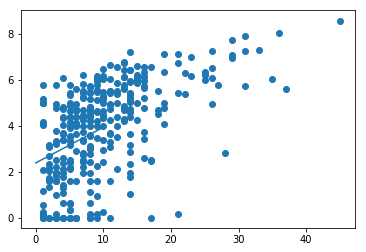

'Probably best model for outliers (interesting players)'

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
attackers=pls[pls['Role']=="A"]
X = pls[["Qt. A","WeightedFantasyEvaluation"]]
X=X.dropna()
y = X["WeightedFantasyEvaluation"]
X=X.drop("WeightedFantasyEvaluation",axis=1)

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

x = np.linspace(0,10,1000)
y2 = reg.intercept_+reg.coef_[0]*x

plt.scatter(X["Qt. A"],y)
plt.plot(x,y2)
plt.show()
'''Probably best model for outliers (interesting players)'''

In [8]:
pls_with_no_mean=pls[pls['MeanFantasyEvaluation'].isnull()]
print(pls_with_no_mean.count())
print("\n\n")
print(pls.count())

Unnamed: 0                     0
Name                         246
VarianceFantasyEvaluation      0
PlayedMatches                  0
Team                           0
Role                           0
MedianFantasyEvaluation        0
WeightedFantasyEvaluation      0
Qt..A                          0
Qt..I                          0
Plays2018_2019                 0
Owner                          0
Price                          0
MantraRole                     0
MeanFantasyEvaluation          0
Id                           246
R                            246
Squadra                      246
Qt. A                        246
Qt. I                        246
Diff.                        246
dtype: int64



Unnamed: 0                   324
Name                         570
VarianceFantasyEvaluation    254
PlayedMatches                324
Team                         260
Role                         324
MedianFantasyEvaluation      260
WeightedFantasyEvaluation    324
Qt..A                      

In [9]:

attrs=pls_with_no_mean[["MeanFantasyEvaluation","Qt. A"]]
attrs=attrs.drop("MeanFantasyEvaluation",axis=1)
pls_with_no_mean["MeanFantasyEvaluation"]=reg.predict(attrs)
#print(pls_with_no_mean[["MeanFantasyEvaluation","Name"]])
print(pls_with_no_mean.count())
print(pls_with_no_mean)

Unnamed: 0                     0
Name                         246
VarianceFantasyEvaluation      0
PlayedMatches                  0
Team                           0
Role                           0
MedianFantasyEvaluation        0
WeightedFantasyEvaluation      0
Qt..A                          0
Qt..I                          0
Plays2018_2019                 0
Owner                          0
Price                          0
MantraRole                     0
MeanFantasyEvaluation        246
Id                           246
R                            246
Squadra                      246
Qt. A                        246
Qt. I                        246
Diff.                        246
dtype: int64
     Unnamed: 0               Name  VarianceFantasyEvaluation  PlayedMatches  \
324         NaN            LUKAKUR                        NaN            NaN   
325         NaN         RAFAELLEAO                        NaN            NaN   
326         NaN             LOZANO                    

/home/asino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
pls_with_mean=pls[pls['MeanFantasyEvaluation'].notnull()]
playerz=pd.concat([pls_with_mean,pls_with_no_mean],ignore_index=True)
print(playerz.count())
playerz.to_csv("players_with_interpolated_mean.csv")

Unnamed: 0                   324
Name                         570
VarianceFantasyEvaluation    254
PlayedMatches                324
Team                         260
Role                         324
MedianFantasyEvaluation      260
WeightedFantasyEvaluation    324
Qt..A                        324
Qt..I                        324
Plays2018_2019                 0
Owner                         72
Price                         70
MantraRole                   324
MeanFantasyEvaluation        570
Id                           570
R                            570
Squadra                      570
Qt. A                        570
Qt. I                        570
Diff.                        570
dtype: int64


In [11]:
from scipy.stats import binom
def probToPlay(playersInField,indexOfPlayer,probabilityOfFault):
    minNumberOfFaults=indexOfPlayer-playersInField
    probOfLessThanOrEqualNFaults=binom.cdf(minNumberOfFaults-1, playersInField, probabilityOfFault)
    return 1-probOfLessThanOrEqualNFaults
print(probToPlay(4,5,0.1))

0.3439


In [12]:
def getPlayerRoleCompatibilityString():
    mantraRoles=pd.read_csv("Quotazioni_Fantacalcio_Ruoli_Mantra.csv")
    mantraRoles=pd.merge(mantraRoles, pls[["Name"]], left_on='Name', right_on='Name',how="inner")
    
    mantraRoles["Name"]=mantraRoles["Name"].str.replace(" ","")
    mantraRoles["Name"]=mantraRoles["Name"].str.replace("-","")
    mantraRoles["Name"]=mantraRoles["Name"].str.replace("'","")
    print(mantraRoles)
    roleCompatibilityString = "set CompatibilityPlayerRole:= \n"
    for  index, player in mantraRoles.iterrows():
        roleCompatibilityString+= "({},*)".format(player["Name"])
        for role in player["R"].split(";"):
            roleCompatibilityString+=" {}".format(role)
        roleCompatibilityString+="\n"
    roleCompatibilityString+=";"
    return roleCompatibilityString

#getPlayerRoleCompatibilityString()

In [13]:
def initializeModules():
    modules={}
    m343=[]
    for i in range(3):
        m343.append(["Dc"])
    for i in range(2):
        m343.append(["E"])
    for i in range(2):
        m343.append(["W","A"])
    m343.append(["C"])
    m343.append(["M","C"])
    m343.append(["A","Pc"])
    modules["m343"]=m343
    
    
    m3412=[]
    for i in range(3):
        m3412.append(["Dc"])
    for i in range(2):
        m3412.append(["E"])
    for i in range(2):
        m3412.append(["Pc","A"])   
    m3412.append(["C"])
    m3412.append(["M","C"])
    m3412.append(["T"])
    modules["m3412"]=m3412  
    
    
    m3421=[]
    for i in range(3):
        m3421.append(["Dc"])  
    m3421.append(["M"])
    m3421.append(["M","C"])
    m3421.append(["E"])
    m3421.append(["T"])
    m3421.append(["E","W"])
    m3421.append(["Pc","A"])
    m3421.append(["T","A"])
    modules["m3421"]=m3421  
    
    m352=[]
    for i in range(3):
        m352.append(["Dc"])
    for i in range(2):
        m352.append(["A","Pc"])
    m352.append(["E","W"])
    m352.append(["M"])
    m352.append(["M","C"])
    m352.append(["E"])
    m352.append(["C"])
    modules["m352"]=m352  
    
    m3511=[]
    for i in range(3):
        m3511.append(["Dc"])
    for i in range(2):
        m3511.append(["M"])
    for i in range(2):
        m3511.append(["E","W"])
    m3511.append(["C"])
    m3511.append(["A","Pc"])
    m3511.append(["T","A"])
    modules["m3511"]=m3511  
    
    
    m433=[]
    for i in range(2):
        m433.append(["Dc"])
    for i in range(2):
        m433.append(["W","A"])
    m433.append(["Dd"])
    m433.append(["Ds"])
    m433.append(["C"])
    m433.append(["M"])
    m433.append(["C","M"])
    m433.append(["A","Pc"])
    modules["m433"]=m433
    
    m4312=[]
    for i in range(2):
        m4312.append(["Dc"])
    m4312.append(["Dd"])
    m4312.append(["Ds"])
    for i in range(2):
        m4312.append(["A","Pc"])
    m4312.append(["C"])
    m4312.append(["M"])
    m4312.append(["C","M"])
    m4312.append(["T"])
    modules["m4312"]=m4312
    
    m442=[]
    for i in range(2):
        m442.append(["Dc"])
    m442.append(["Dd"])
    m442.append(["Ds"])
    for i in range(2):
        m442.append(["A","Pc"])
    m442.append(["C"])
    m442.append(["E"])
    m442.append(["C","M"])
    m442.append(["E","W"])
    modules["m442"]=m442
    
    m4141=[]
    for i in range(2):
        m4141.append(["Dc"])
    m4141.append(["Dd"])
    m4141.append(["Ds"])
    for i in range(2):
        m4141.append(["C","T"])
    for i in range(2):
        m4141.append(["W"])
    m4141.append(["M"])
    m4141.append(["A","Pc"])
    modules["m4141"]=m4141
    
    m4411=[]
    for i in range(2):
        m4411.append(["Dc"])
    m4411.append(["Dd"])
    m4411.append(["Ds"])
    for i in range(2):
        m4411.append(["E","W"])
    m4411.append(["C"])
    m4411.append(["A","T"])
    m4411.append(["M"])
    m4411.append(["A","Pc"])
    modules["m4411"]=m4411
    
    m4231=[]
    for i in range(2):
        m4231.append(["Dc"])
    m4231.append(["Dd"])
    m4231.append(["Ds"])
    
    m4231.append(["M"])
    m4231.append(["M","C"])
    m4231.append(["W"])
    m4231.append(["T"])
    m4231.append(["A","Pc"])
    m4231.append(["W","A"])
    modules["m4231"]=m4231
    
    for key,mod in modules.items():
        mod.append(["Por"])
        
    uselessModules=["m3412","M3421","m352","m4312"]
    for uselessModule in uselessModules:
        del modules[uselessModule]
    return modules


def produceStringFromDictOfModules(dictOfModules):
    retString="set CompatibilitySlotRole:=\n"
    modString="set Modules:= "
    for key,val in dictOfModules.items():
        numberOfSlot=1
        modString+=" {}".format(key)
        for slot in val:
            retString+="({},{},*) =".format(key,numberOfSlot)
            for role in slot:
                retString+=" {} ".format(role)
            retString+="\n"
            numberOfSlot+=1
    retString+=";\n"
    retString+=modString
    retString+=";\n"
    
    
    return retString;



In [14]:
def initializeMilp(playersDF):
    performanceString = "param:performance := \n"
    costString = "param :cost:= \n"
    playersString = "set Players:= "
    boughtParameterString= "param:alreadyBought:="
    roleSlotString="set CompatibilitySlotRole:= \n"
    
    
    probabilityOfFault=0.1
    
    cont=0
    slotPos=1
    
    for  index, player in playersDF.iterrows():
        if not player["bought"]:
            cont+=1
            performanceString+= "{} {}\n".format(player["name"],player["perf"])
            costString+= "{} {}\n".format(player["name"],player["cost"])
            boughtParameterString+= "{} {}\n".format(player["name"],player["bought"])
            playersString+= " {} ".format(player["name"])

    print("{} players available".format(cont))



    roleCompatibilityString=getPlayerRoleCompatibilityString()
    performanceString+= ";\n"
    costString+= ";\n"
    playersString+= ";\n"
    boughtParameterString+= ";\n"
    roleSlotString=produceStringFromDictOfModules(initializeModules())
    
    with open('dat-file-configuration-mantra.txt', 'r') as file:
        fixedHeader  =  file.read()
        with open('fantasy-auction-mantra.dat', 'w') as outputFile:
            #outputFile.write("param  budget:={};\n".format(BUDGET))
            outputFile.write(fixedHeader)
            outputFile.write(roleSlotString)
            #outputFile.write(multiplierString)
            outputFile.write(playersString)
            outputFile.write(roleCompatibilityString)
            outputFile.write(performanceString)
            #outputFile.write(costString)
            outputFile.write(boughtParameterString)
            

In [15]:
playerz["bought"]=0
playerz["name"]=playerz["Name"]
playerz["role"]=playerz["R"]
playerz["perf"]=playerz["MeanFantasyEvaluation"]
playerz["cost"]=0
BUDGET=500
initializeMilp(playerz)

570 players available
       Id        R          Name     Squadra  Qt. Amantra  Qt. Imantra  Diff.
0    2756       Pc        PIATEK       Milan           37           38     -1
1     785       Pc      IMMOBILE       Lazio           36           34      2
2     568       Pc  QUAGLIARELLA   Sampdoria           33           34     -1
3     277       Pc        ICARDI       Inter           31           31      0
4     647       Pc         DZEKO        Roma           31           30      1
5     441       Pc       BELOTTI      Torino           31           30      1
6     409        A       INSIGNE      Napoli           29           27      2
7     408       Pc       HIGUAIN    Juventus           28           28      0
8     410       Pc       MERTENS      Napoli           28           27      1
9    2012       Pc         MILIK      Napoli           28           28      0
10   2002      W;A        CHIESA  Fiorentina           27           27      0
11   2819       Pc        CAPUTO    Sassuo

KeyError: 'M3421'